In [1]:
%matplotlib inline
import pandas as pd  # To play with data tables
import matplotlib.pyplot as plt  # To visualize data
import numpy as np
import copy

In [2]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

#### You can learn various Regression (supervised learning technique) models on sklearn
https://scikit-learn.org/stable/supervised_learning.html

In [3]:
# Download a public file from Google drive
import gdown


## To learn more refer to:https://pypi.org/project/gdown/

### 1. Load train data table

In [4]:
!gdown 12m6iqvaAchdqAUCdvVxGQWSG6DREqF5h

Downloading...
From: https://drive.google.com/uc?id=12m6iqvaAchdqAUCdvVxGQWSG6DREqF5h
To: /home/omkar-khilari/ms2300/ms2300notebooks/alloy-confp-train-data_v2.csv
100%|██████████████████████████████████████| 7.33k/7.33k [00:00<00:00, 11.2MB/s]


In [5]:
#Lead data from a CSV file to a pandas dataframe

data = pd.read_csv('alloy-confp-train-data_v2.csv')
data

,ID,HV,C.al,C.co,C.cr,C.cu,C.fe,C.ni
0,7,139,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000
1,48,295,0.153846,0.307692,0.153846,0.076923,0.153846,0.153846
2,108,545,0.222222,0.111111,0.000000,0.222222,0.222222,0.222222
3,146,701,0.428571,0.214286,0.071429,0.071429,0.071429,0.142857
4,37,207,0.090909,0.181818,0.181818,0.181818,0.181818,0.181818
...,...,...,...,...,...,...,...,...
115,42,249,0.166667,0.333333,0.000000,0.166667,0.166667,0.166667
116,72,450,0.117647,0.000000,0.294118,0.000000,0.441176,0.147059
117,73,451,0.166667,0.250000,0.166667,0.083333,0.166667,0.166667
118,135,617,0.166667,0.166667,0.333333,0.000000,0.166667,0.166667


#### Notes about the data table

Above we see that data table has 3 types of columns:

1. ID: Serial number of the alloys.

2. HV: This is the experimentally measured hardness values of the alloys. Our target property (y).

3. C.*: concentration of different elements in the alloys.

#### Given set of equations

$ X_{n\times m} = \begin{bmatrix} x_{11} & x_{12} & ... & x_{1m} \\ x_{21} & x_{22} & ... & x_{2m} \\ \vdots & \vdots & \vdots & \vdots
\\ x_{n1} & x_{n2} & ... & x_{nm}\end{bmatrix}$

$ Y_{n \times 1} = \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n}\end{bmatrix}$


$n = 120$

$m = 6$

#### Separate X and Y data

X = independent variable
Y = dependent variable

In [6]:
Xcols = data.columns[data.columns.str.contains("C.")]
X = data[Xcols]
X

,C.al,C.co,C.cr,C.cu,C.fe,C.ni
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000
1,0.153846,0.307692,0.153846,0.076923,0.153846,0.153846
2,0.222222,0.111111,0.000000,0.222222,0.222222,0.222222
3,0.428571,0.214286,0.071429,0.071429,0.071429,0.142857
4,0.090909,0.181818,0.181818,0.181818,0.181818,0.181818
...,...,...,...,...,...,...
115,0.166667,0.333333,0.000000,0.166667,0.166667,0.166667
116,0.117647,0.000000,0.294118,0.000000,0.441176,0.147059
117,0.166667,0.250000,0.166667,0.083333,0.166667,0.166667
118,0.166667,0.166667,0.333333,0.000000,0.166667,0.166667


In [7]:
Y = data['HV']
Y

0      139
1      295
2      545
3      701
4      207
      ... 
115    249
116    450
117    451
118    617
119    171
Name: HV, Length: 120, dtype: int64

### 2. Visualize data

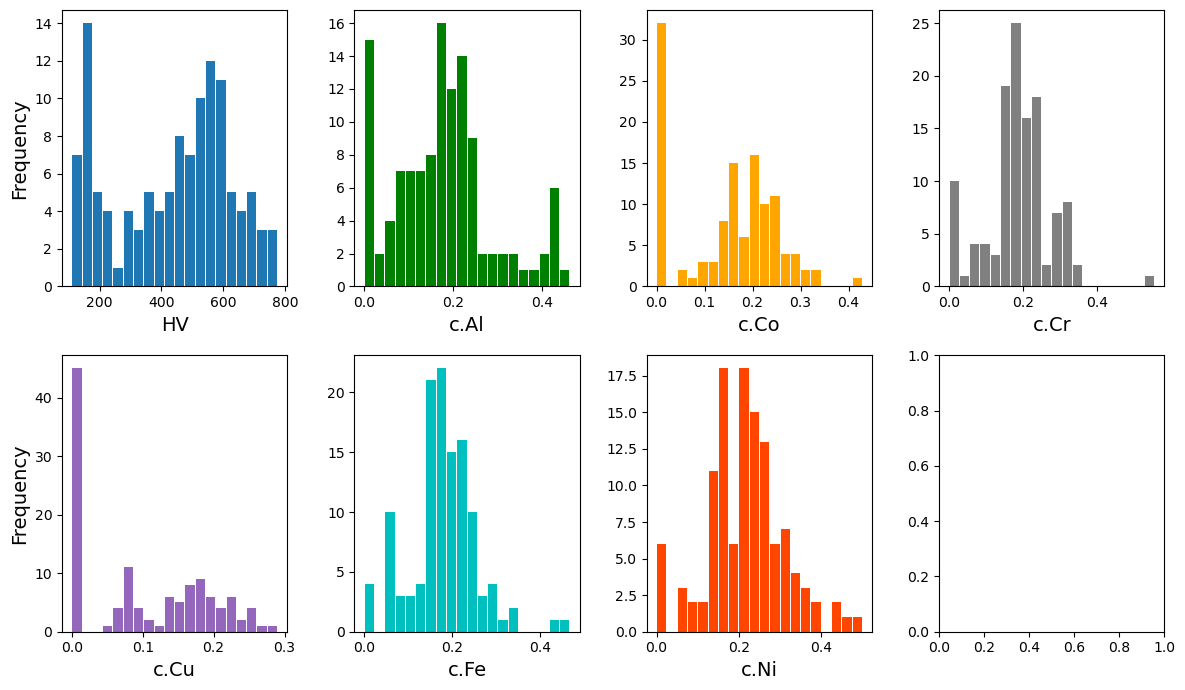

In [8]:
## break a figure into 8 sub-plots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(12,7.0))

# plot-dependent variable (Y) in first (1,1) subplot
ax1.hist(Y.values, bins=20, rwidth=0.9, label='HV')

# plot-first elements compositions (Al, Co, Cr, Cu, Fe, Ni) in the subsequent plots
ax2.hist(X.values[:,0], bins=20, rwidth=0.9,facecolor='g', label='c.Al')
ax3.hist(X.values[:,1], bins=20, rwidth=0.9,facecolor='orange', label='c.Co')
ax4.hist(X.values[:,2], bins=20, rwidth=0.9,facecolor='grey', label='c.Cr')
ax5.hist(X.values[:,3], bins=20, rwidth=0.9,facecolor='tab:purple', label='c.Cu')
ax6.hist(X.values[:,4], bins=20, rwidth=0.9,facecolor='c', label='c.Fe')
ax7.hist(X.values[:,5], bins=20, rwidth=0.9,facecolor='orangered', label='c.Ni')


#Set axis-labels for the sub-plots
ax1.set_xlabel('HV', fontsize=14)
ax2.set_xlabel('c.Al', fontsize=14)
ax3.set_xlabel('c.Co', fontsize=14)
ax4.set_xlabel('c.Cr', fontsize=14)
ax5.set_xlabel('c.Cu', fontsize=14)
ax6.set_xlabel('c.Fe', fontsize=14)
ax7.set_xlabel('c.Ni', fontsize=14)

ax1.set_ylabel('Frequency', fontsize=14)
ax5.set_ylabel('Frequency', fontsize=14)


plt.tight_layout()

#### Question
1. Is it helpful to visualize data?

### 3. Train an ML model

In [9]:
# First we will define function to make plots. This will make the code simpler.

def polt_parity(y_cv_test,y_pred_test, y_cv_train=None,y_pred_train=None, label=None, ylim=[50,900]):
    """
    Function to make parity plots.
    """

    # Plot Parity plot
    rmse_test = np.sqrt(mean_squared_error(y_cv_test,y_pred_test))
    r2_test = r2_score(y_cv_test,y_pred_test)

    if y_cv_train is None:
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4), sharey=True, sharex=True)
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)

    ax1.scatter(y_cv_test,y_pred_test)
    ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.18, "RMSE: %.2f"%rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R$^2$: %.2f"%r2_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.plot(ylim, ylim, '--k')
    ax1.set_xlabel('True Y', fontsize=14)
    ax1.set_ylabel('Pred Y', fontsize=14)
    ax1.set_xlim(ylim[0],ylim[1])
    ax1.set_ylim(ylim[0],ylim[1])

    if y_cv_train is not None:
        rmse_train = np.sqrt(mean_squared_error(y_cv_train,y_pred_train))
        r2_train = r2_score(y_cv_train,y_pred_train)

        ax2.scatter(y_cv_train,y_pred_train, c='m')
        ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)
        ax2.text(0.95, 0.18, "RMSE: %.2f"%rmse_train, transform=ax2.transAxes, ha='right', fontsize=14)
        ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)
        ax2.plot(ylim, ylim, '--k')

        ax2.set_xlabel('True Y', fontsize=14)
        ax2.set_xlim(ylim[0],ylim[1])
        ax2.set_ylim(ylim[0],ylim[1])

    plt.tight_layout()
    plt.show()

    return None

#### Given set of equations

$ X_{(n\times m)} = \begin{bmatrix} x_{11} & x_{12} & ... & x_{1m} \\ x_{21} & x_{22} & ... & x_{2m} \\ \vdots & \vdots & \vdots & \vdots
\\ x_{n1} & x_{n2} & ... & x_{nm}\end{bmatrix}$

$ W_{(m \times 1)} = \begin{bmatrix} w_{1} \\ w_{2} \\ \vdots \\ w_{m}\end{bmatrix}$

Predict Y using:
$ \hat{Y} = X W$


Error is given as:
$ Y - \hat{Y} = \epsilon$

Minimizing the least square error, gives solution:

$W = (X^{T}X)^{-1}X^{T}Y$

In [10]:
X_tras_X_inv = np.linalg.inv(np.dot(X.T,X))
X_tras_Y = np.dot(X.T,Y)
w_vec = np.dot(X_tras_X_inv,X_tras_Y)
Y_pred_manual = np.dot(X,w_vec)

In [11]:
polt_parity(Y,Y_pred_manual, label="Train")

NameError: name 'mean_squared_error' is not defined

In [ ]:
#### Using sklearn in-built python library

In [ ]:
lr = LinearRegression(fit_intercept=False)
model = lr.fit(X,Y)
lr_model = copy.deepcopy(model)

In [ ]:
#Predicted values using sklearn-in-built linear regression model
#model.predict(X)

#length of the predicted vector
#len(model.predict(X))

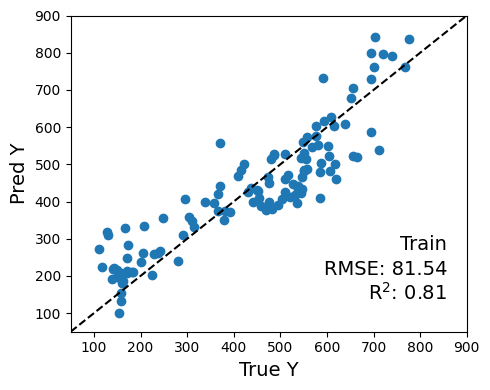

In [ ]:
Y_pred = model.predict(X)
polt_parity(Y,Y_pred, label="Train")

In [ ]:
#### Comparing sklearn library vs our equation results

In [ ]:
print("Sklearn model: ", lr_model.coef_)
print("Eq. based model: ", w_vec)

Sklearn model:  [1589.03703891  154.02145017  647.00169133  279.68594241  204.32826373
 -241.42532589]
Eq. based model:  [1589.03703891  154.02145017  647.00169133  279.68594241  204.32826373
 -241.42532589]


In [ ]:
#### What if we assume some baseline model, where predict values are same as the average value
Y_avg_pred = [Y.mean()]*len(Y)

#print(np.array(Y_avg_pred))
#print(Y_pred_manual)

In [ ]:
# Errors for the baseline - average value model

print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(Y, Y_avg_pred)))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, Y_avg_pred))

Root mean squared error: 186.35
Coefficient of determination: 0.00


#### Question
2. Why is it important to compare model performance with a baseline model?

### 4. Model assessment, cross-validation

In [ ]:
from sklearn.model_selection import KFold
KFold?

In [ ]:
kf = KFold(n_splits=2)
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
#kf = KFold(n_splits=5, shuffle=True)
#kf = KFold(n_splits=5, shuffle=True, random_state=1)
#kf

In [ ]:
#for idx, (train, val) in enumerate(kf.split(X)):
#    print(idx, train, val)


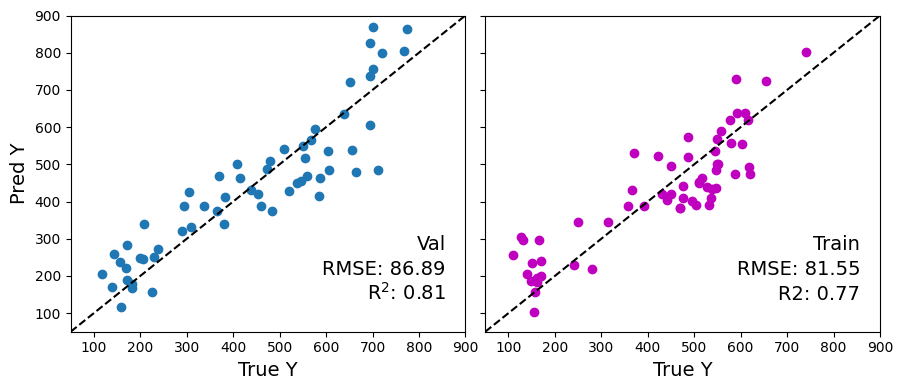

Root mean squared error: 86.89
Coefficient of determination: 0.81


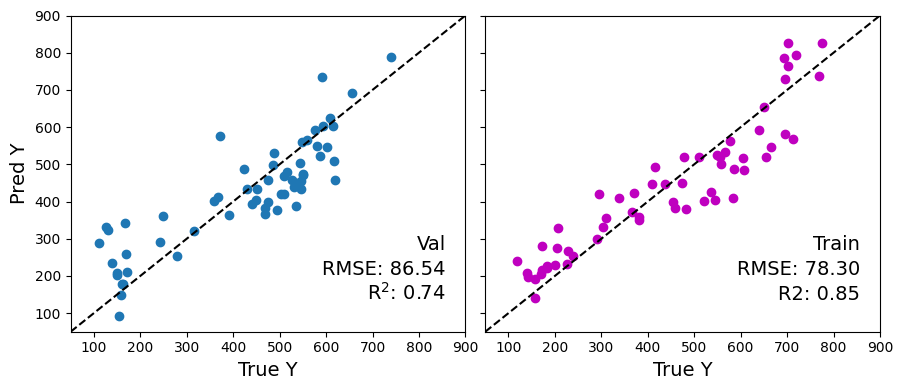

Root mean squared error: 86.54
Coefficient of determination: 0.74


In [ ]:
#kf = KFold(n_splits=5)

errors = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = Y.values[train]
    y_cv_val = Y.values[val]


    # Model fit and prediction
    model = lr.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    rmse_val = np.sqrt(mean_squared_error(y_cv_val, y_pred_val))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)


    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train, label="Val")

    print("Root mean squared error: %.2f" % rmse_val)
    print("Coefficient of determination: %.2f" % r2_val)

    error = {'kfold': idx+1,
             'rmse_train': rmse_train,
             'r2_train': r2_train,
             'rmse_val': rmse_val,
             'r2_val': r2_val
            }

    errors.append(error)

In [ ]:
errors = pd.DataFrame(errors)
errors

,kfold,rmse_train,r2_train,rmse_val,r2_val
0,1,81.554300,0.773366,86.885795,0.810803
1,2,78.304636,0.846329,86.537344,0.744825


### Question:

1. Why error on training set is consistently lower than that on validation set?
2. Further, the errors on various validation sets are also different. Which is the correct value that best estimate the performance of the ML model?

In [ ]:
errors[['rmse_val','r2_val']].mean()

rmse_val    86.711569
r2_val       0.777814
dtype: float64

### 5. Polynomial Regression

Building polynomial features

In [ ]:
# CLASSWORK : LEAST SQUARES

In [12]:
def with_powers(cols, power):
    data = pd.read_csv('alloy-confp-train-data_v2.csv')
    
    selected_col = data[cols]
    powered_data = selected_col ** power
    
    return powered_data

def product_of_powers(cols, power):
        result = with_powers(cols, power)

        product_col = result[cols[0]] * result[cols[1]]
        product_df = pd.DataFrame({'Product': product_col})

        return product_df


cols = ['C.al', 'C.cr']
powers = [2, 3]

res = product_of_powers(cols, powers)
name = "new_col_1"
data[name] = res['Product']

print(data)

      ID   HV      C.al      C.co      C.cr      C.cu      C.fe      C.ni  \
0      7  139  0.000000  0.250000  0.250000  0.000000  0.250000  0.250000   
1     48  295  0.153846  0.307692  0.153846  0.076923  0.153846  0.153846   
2    108  545  0.222222  0.111111  0.000000  0.222222  0.222222  0.222222   
3    146  701  0.428571  0.214286  0.071429  0.071429  0.071429  0.142857   
4     37  207  0.090909  0.181818  0.181818  0.181818  0.181818  0.181818   
..   ...  ...       ...       ...       ...       ...       ...       ...   
115   42  249  0.166667  0.333333  0.000000  0.166667  0.166667  0.166667   
116   72  450  0.117647  0.000000  0.294118  0.000000  0.441176  0.147059   
117   73  451  0.166667  0.250000  0.166667  0.083333  0.166667  0.166667   
118  135  617  0.166667  0.166667  0.333333  0.000000  0.166667  0.166667   
119   28  171  0.000000  0.212575  0.212575  0.212575  0.149701  0.212575   

     new_col_1  
0     0.000000  
1     0.000086  
2     0.000000  
3     0